**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( J )

---


Analista de dados:
* Arthur Cavalcante de Andrade
* William Teixeira Pires Junior

---

# Análise Exploratória dos Dados

## Carregando os dados e pequenos ajustes

In [6]:
from IPython.display import Image
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

Definimos as seguintes opções do `pandas` para que ele não mostre valores de forma resumida.

In [7]:
pandas.options.display.width = 0
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

Importamos e verificamos algumas informações iniciais dos dados.

In [8]:
data = pandas.read_csv('dataset.csv')
print('número de linhas: ', len(data))
print('colunas: ', *data.columns, sep=' -- ')
data.head()

número de linhas:  91713
colunas:  -- encounter_id -- patient_id -- hospital_id -- age -- bmi -- elective_surgery -- ethnicity -- gender -- height -- icu_admit_source -- icu_id -- icu_stay_type -- icu_type -- pre_icu_los_days -- weight -- apache_2_diagnosis -- apache_3j_diagnosis -- apache_post_operative -- arf_apache -- gcs_eyes_apache -- gcs_motor_apache -- gcs_unable_apache -- gcs_verbal_apache -- heart_rate_apache -- intubated_apache -- map_apache -- resprate_apache -- temp_apache -- ventilated_apache -- d1_diasbp_max -- d1_diasbp_min -- d1_diasbp_noninvasive_max -- d1_diasbp_noninvasive_min -- d1_heartrate_max -- d1_heartrate_min -- d1_mbp_max -- d1_mbp_min -- d1_mbp_noninvasive_max -- d1_mbp_noninvasive_min -- d1_resprate_max -- d1_resprate_min -- d1_spo2_max -- d1_spo2_min -- d1_sysbp_max -- d1_sysbp_min -- d1_sysbp_noninvasive_max -- d1_sysbp_noninvasive_min -- d1_temp_max -- d1_temp_min -- h1_diasbp_max -- h1_diasbp_min -- h1_diasbp_noninvasive_max -- h1_diasbp_noninvasive_min

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


Vamos então filtrar informações desnecessárias.

In [9]:
print('Quantidade de valores não nulos em `Unnamed: 83`: ', len(data['Unnamed: 83'].value_counts()))

Quantidade de valores não nulos em `Unnamed: 83`:  0


Como todos os valores na coluna '`Unnamed: 83`' são nulos, iremos remove-la, assim como as colunas `encounter_id`, `icu_id`, `patient_id` e `hospital_id` que são irrelevantes para a solução do problema.

In [10]:
data = data.drop('Unnamed: 83', axis=1)
data = data.drop('encounter_id', axis=1)
data = data.drop('icu_id', axis=1)
data = data.drop('patient_id', axis=1)
data = data.drop('hospital_id', axis=1)
data.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


## Avaliações iniciais

### Idade

Começaremos verificando a relação entre óbito e idade do paciente.

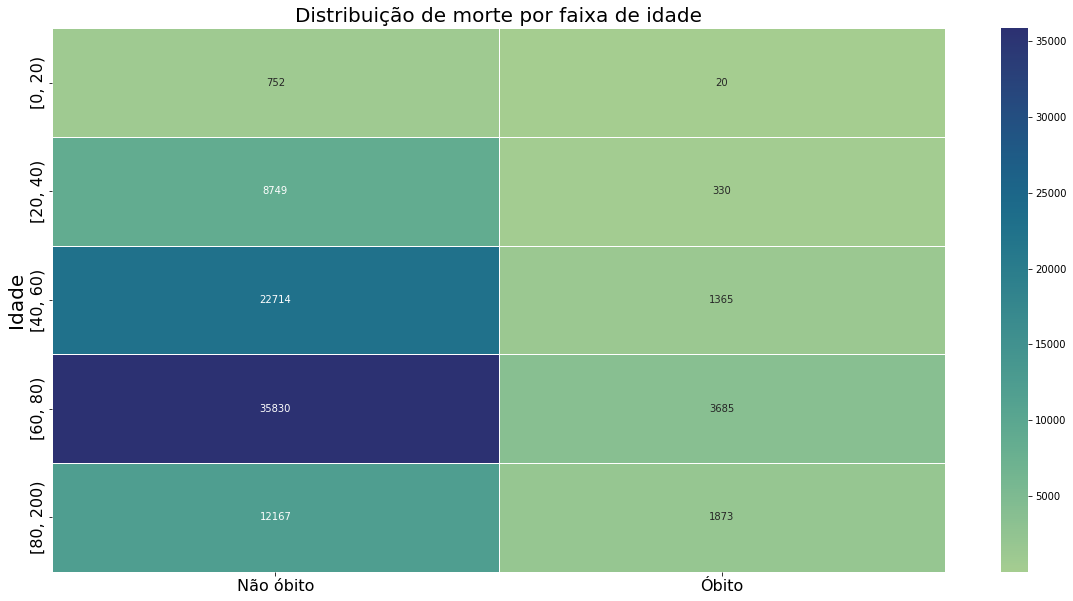

In [11]:
# Fazemos uma cópia dos dados para criar temporariamente um atributo de grupos de idade.
age_data = data.copy()
age_data["age_range"] = pandas.cut(age_data.age, bins=[0,20,40,60,80,200], right=False)

# Criamos uma lista com a quantidade de morte e não morte por faixa de idade.
aux = list(dict.fromkeys(age_data.groupby(['age_range'])['hospital_death'].value_counts()))

# Transformamos a lista em uma matriz
age_correlation = []
while aux != []:
    age_correlation.append(aux[:2])
    aux = aux[2:]


# label para faixa de idade
y_label = ["[0, 20)", "[20, 40)", "[40, 60)", "[60, 80)", "[80, 200)"]

# Apresentação dos dados em forma de heatmap
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(age_correlation, annot=True, fmt="d", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Idade', fontsize=20)
ax.set_yticklabels(y_label, fontsize=16)
ax.set_xticklabels(["Não óbito", "Óbito"], fontsize=16)
ax.set_title('Distribuição de morte por faixa de idade', fontsize=20)
fig.savefig('heatmap_idade.jpg')

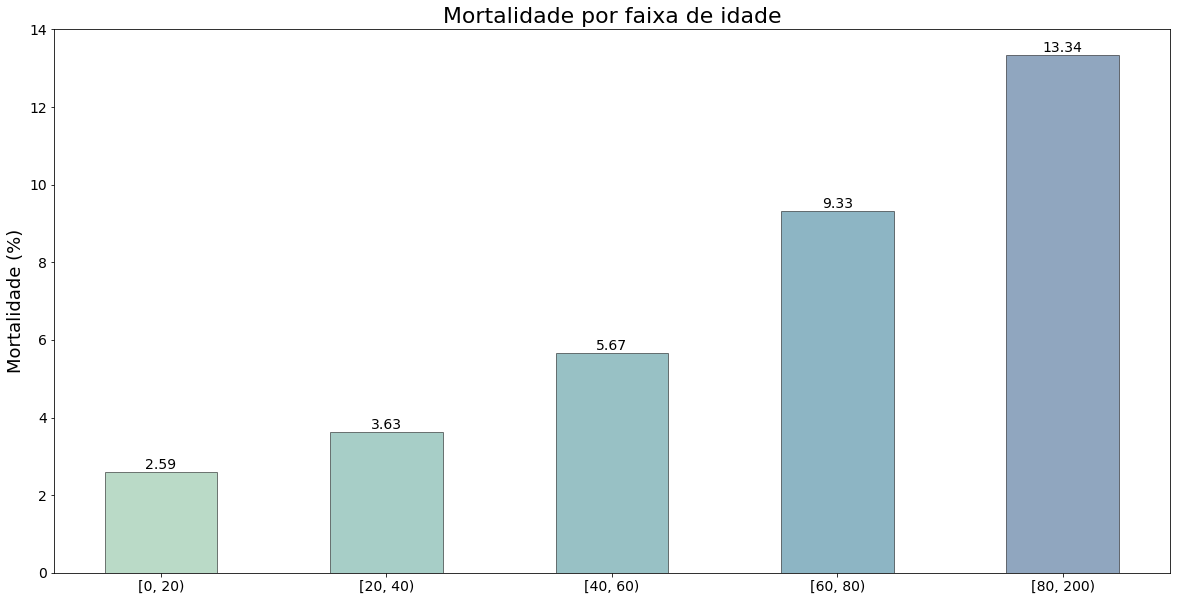

In [12]:
# Apenas informações de pessoas com óbito
death_data = age_data.loc[data['hospital_death'] == 1]

# Calculo da taxa de morte por faixa de idade
death_ratio_age_range = []
for age_range_info in age_correlation:
    qtd_death = age_range_info[1]
    total = age_range_info[0] + age_range_info[1]
    death_ratio_age_range.append(qtd_death / total)

# Atribuição de dados para o gráfico
x_data = ["[0, 20)", "[20, 40)", "[40, 60)", "[60, 80)", "[80, 200)"]
y_data = [round(value * 100, 2) for value in death_ratio_age_range]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por faixa de idade', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_idade.png')
plt.show()

Podemos ver que quanto mais avançada a idade, maior a quantidade de internações e taxa de morte.

## Dados incompletos

### Atributos Simbólicos

Começaremos verificando os atributos com tipo ``string``.

In [13]:
print('Colunas do tipo texto: ', *data.select_dtypes(include=['object']).columns.tolist(), sep=' -- ')

Colunas do tipo texto:  -- ethnicity -- gender -- icu_admit_source -- icu_stay_type -- icu_type -- apache_3j_bodysystem -- apache_2_bodysystem


#### Etnia

In [14]:
# Lista de etnias
ethnicity_types = list(dict.fromkeys(data['ethnicity']))
ethnicity_types.remove(numpy.nan)
print(ethnicity_types)

['Caucasian', 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']


In [15]:
print('Quantidade de valores nulos no atributo etnia: ', data['ethnicity'].isnull().sum())

Quantidade de valores nulos no atributo etnia:  1395


Como existe um valor `'Other/Unknown'` vamos atribui-lo aos campos vazios que existem no atributo referente a etnia.

In [16]:
data['ethnicity'] = data['ethnicity'].fillna('Other/Unknown')

Vamos então verificar a mortalidade por etnia.

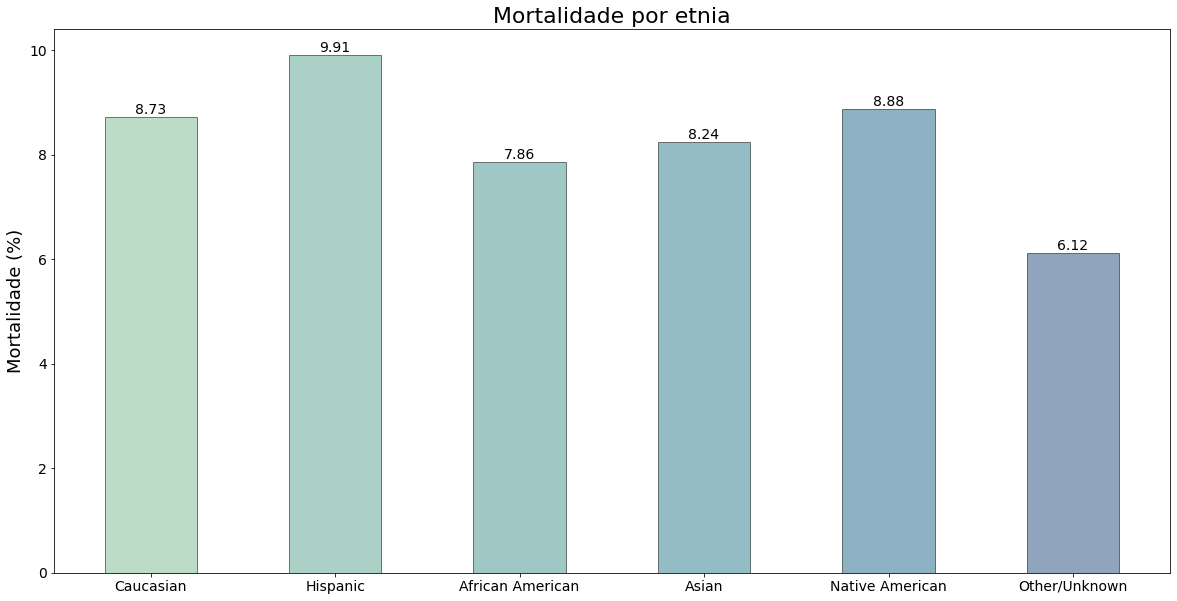

In [17]:
# Calculo da taxa de morte por etnia
death_ratio_ethnicity = []
for ethnicity in ethnicity_types:
    qtd_death = len(death_data.loc[death_data['ethnicity'].str.match(ethnicity, na=False)])
    total = len(data.loc[data['ethnicity'].str.match(ethnicity, na=False)])
    death_ratio_ethnicity.append(qtd_death / total)

# Atribuição de dados para o gráfico
x_data = ethnicity_types
y_data = [round(value * 100, 2) for value in death_ratio_ethnicity]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por etnia', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_etnia.png')
plt.show()

#### Gênero

Vemos que existe uma leve variação na taxa de mortalidade a depender da etnia, possivelmente por questões socioeconômicas associadas à etnia. Essa informação pode ser importante para a rede neural, e por isso a manteremos na base de dados.

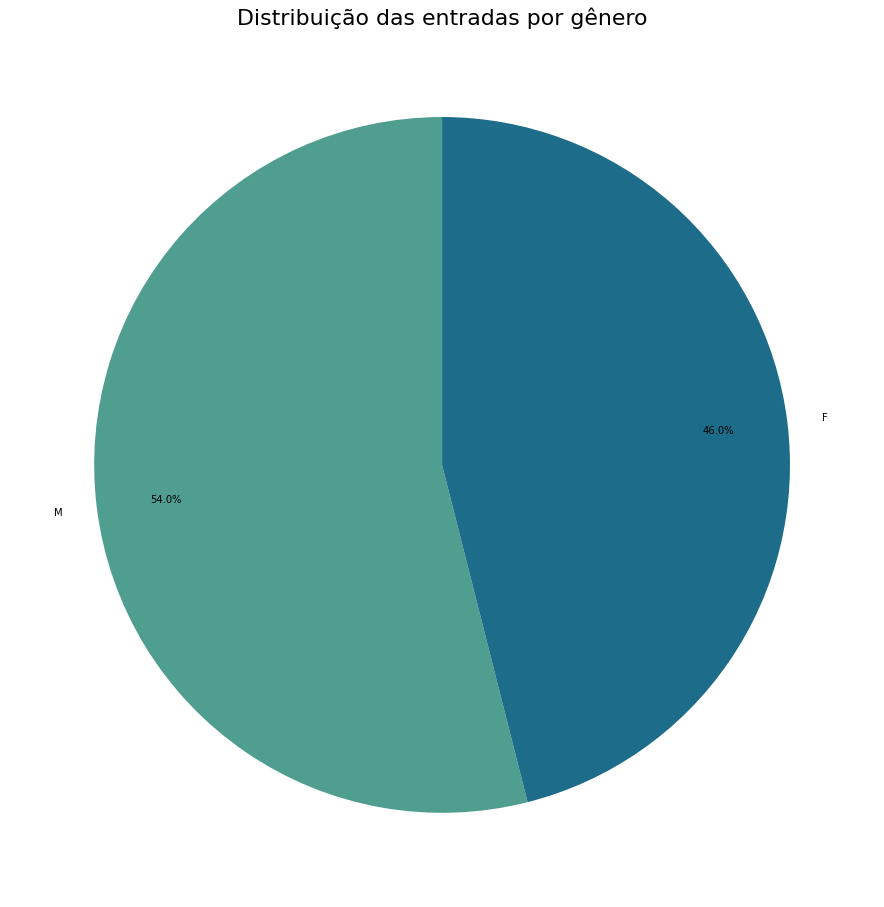

In [18]:
# Seleção dos valores possíveis para gênero
gender_types = list(dict.fromkeys(data['gender']))
gender_types.remove(numpy.nan)

# Atribuição de dados para o gráfico
values = [value / len(data) for value in list(dict.fromkeys(data['gender'].value_counts()))]
labels = gender_types
colors = seaborn.color_palette('crest', n_colors=2)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1)
ax.set_title('Distribuição das entradas por gênero', fontsize=22)
fig.savefig('qtd_genero.png')
plt.show()

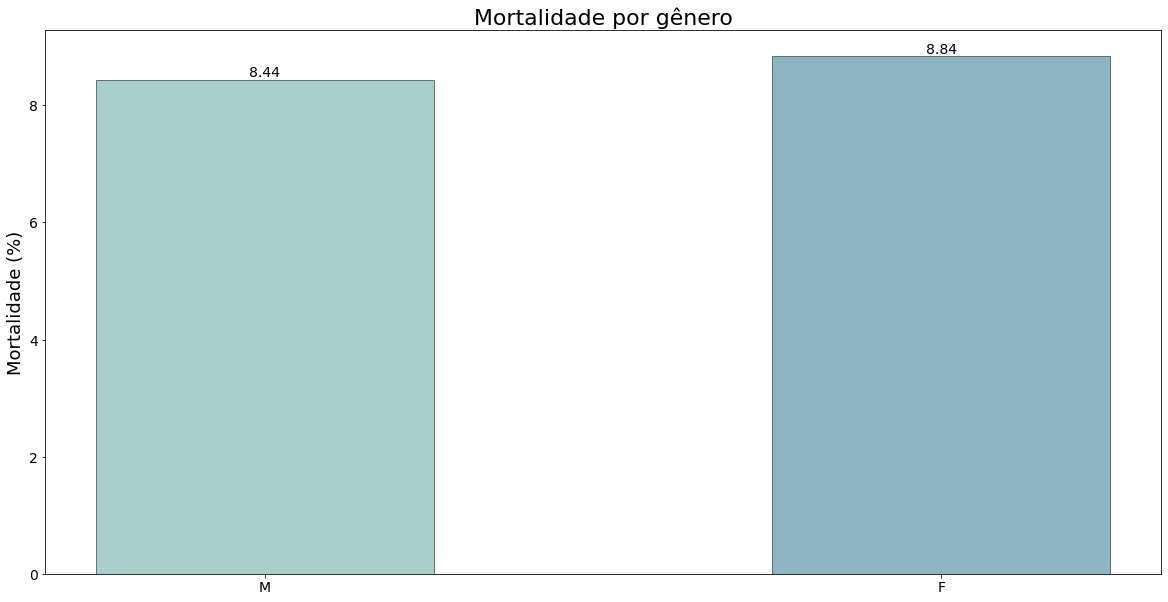

In [19]:
# Cálculo da taxa de morte por gênero
death_ratio_gender = []
for gender in gender_types:
    qtd_death = len(death_data.loc[death_data['gender'].str.match(gender, na=False)])
    total = len(data.loc[data['gender'].str.match(gender, na=False)])
    death_ratio_gender.append(qtd_death / total)

# Atribuição de dados para o gráfico
x_data = gender_types
y_data = [round(value * 100, 2) for value in death_ratio_gender]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por gênero', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_genero.png')
plt.show()

Vemos que a quantidade de entradas por gênero é relativamente equilibrada e não parece haver grande diferença na mortalidade quando olhando o gênero. De fato, esperamos que a capacidade de detectar um óbito seja a mesma independente do gênero, e por isso removeremos essa coluna.

In [20]:
data = data.drop('gender', axis=1)
data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,Caucasian,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.95,0,Caucasian,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


#### Origem do paciente

O atributo `icu_admit_source` se refere ao local onde o paciente se encontrava antes de ser transferido para a UTI, verifiquemos se há valores desconhecidos para esse atributo.

In [21]:
print('Quantidade de valores nulos no atributo icu_admit_source: ', data['icu_admit_source'].isnull().sum())

Quantidade de valores nulos no atributo icu_admit_source:  112


Nesse caso não temos uma opção para origens desconhecidas do paciente. Optaremos então por atribuir a moda aos valores desconhecidos, uma vez que a baixa ocorrência não deve resultar em grandes imprecisões para a rede neural.

In [22]:
moda = data['icu_admit_source'].mode()[0]
print('Moda de icu_admit_source: ', moda)
data['icu_admit_source'] = data['icu_admit_source'].fillna(moda)

Moda de icu_admit_source:  Accident & Emergency


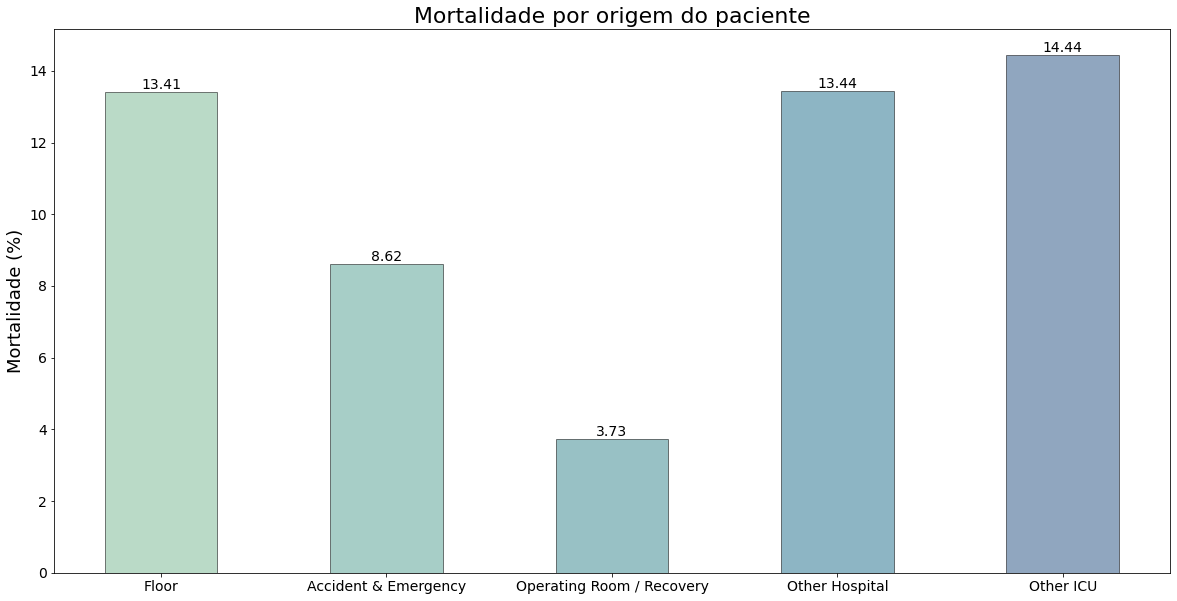

In [23]:
# Seleção dos valores possíveis para icu_admit_source
icu_admit_sources = list(dict.fromkeys(data['icu_admit_source']))

# Cálculo da taxa de morte por origem da internação
death_ratio_source = []
for source in icu_admit_sources:
    qtd_death = len(death_data.loc[death_data['icu_admit_source'].str.match(source, na=False)])
    qtd_non_death = len(data.loc[data['icu_admit_source'].str.match(source, na=False)])
    death_ratio_source.append(qtd_death / qtd_non_death)

# Atribuição de dados para o gráfico
x_data = icu_admit_sources
y_data = [round(value * 100, 2) for value in death_ratio_source]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por origem do paciente', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_origem.png')
plt.show()

#### Tipo de estadia e UTI

In [24]:
print('Quantidade de valores nulos no atributo icu_stay_type: ', data['icu_stay_type'].isnull().sum())
print('Quantidade de valores nulos no atributo icu_type: ', data['icu_type'].isnull().sum())

Quantidade de valores nulos no atributo icu_stay_type:  0
Quantidade de valores nulos no atributo icu_type:  0


Como podemos ver não há valores nulos nos atributos icu_stay_type e icu_type, que representam o tipo de estadia do paciente alocado na unidade e o tipo da unidade respectivamente. 

In [25]:
# Seleção dos valores possíveis para icu_stay_type e icu_type
icu_stay_types = list(dict.fromkeys(data['icu_stay_type']))
icu_types = list(dict.fromkeys(data['icu_type']))

print('Valores em icu_stay_type: ', icu_stay_types)
print('Valores em icu_type: ', icu_types)

# Cálculo da taxa de morte por tipo de estadia e tipo de UTI
death_ratio_icu_stay = []
for icu_type in icu_stay_types:
    qtd_death = len(death_data.loc[death_data['icu_stay_type'].str.match(icu_type, na=False)])
    qtd_non_death = len(data.loc[data['icu_stay_type'].str.match(icu_type, na=False)])
    death_ratio_icu_stay.append(qtd_death / qtd_non_death)

death_ratio_icu_type = []
for icu_type in icu_types:
    qtd_death = len(death_data.loc[death_data['icu_type'].str.match(icu_type, na=False)])
    qtd_non_death = len(data.loc[data['icu_type'].str.match(icu_type, na=False)])
    death_ratio_icu_type.append(qtd_death / qtd_non_death)

Valores em icu_stay_type:  ['admit', 'readmit', 'transfer']
Valores em icu_type:  ['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU', 'Cardiac ICU', 'CSICU']


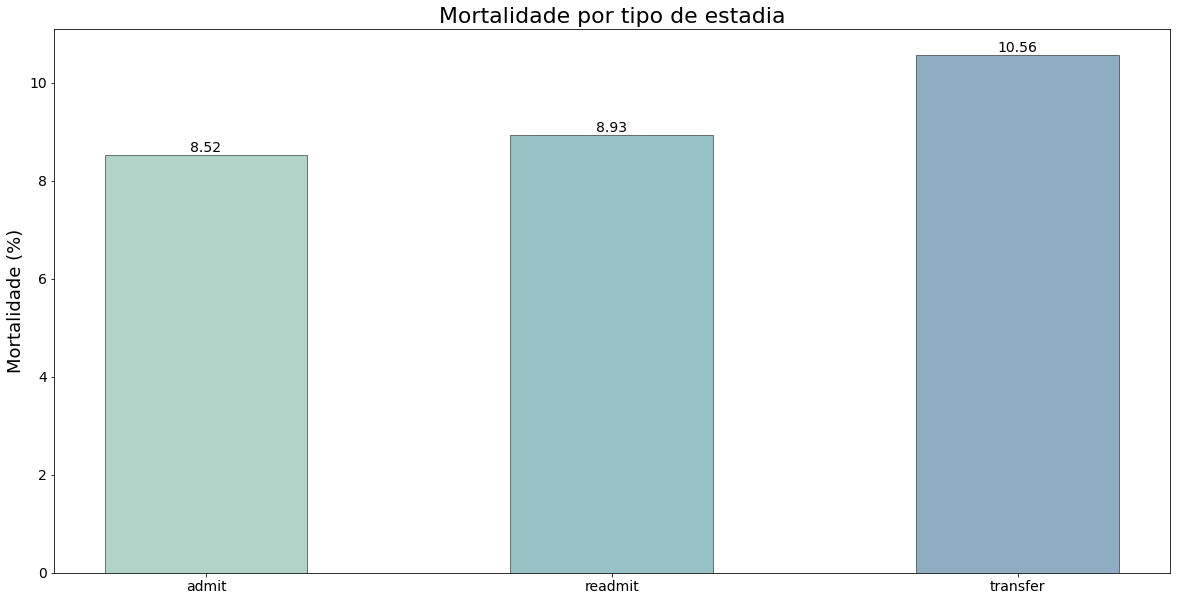

In [26]:
# Atribuição de dados para o gráfico
x_data = icu_stay_types
y_data = [round(value * 100, 2) for value in death_ratio_icu_stay]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por tipo de estadia', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_estadia.png')
plt.show()

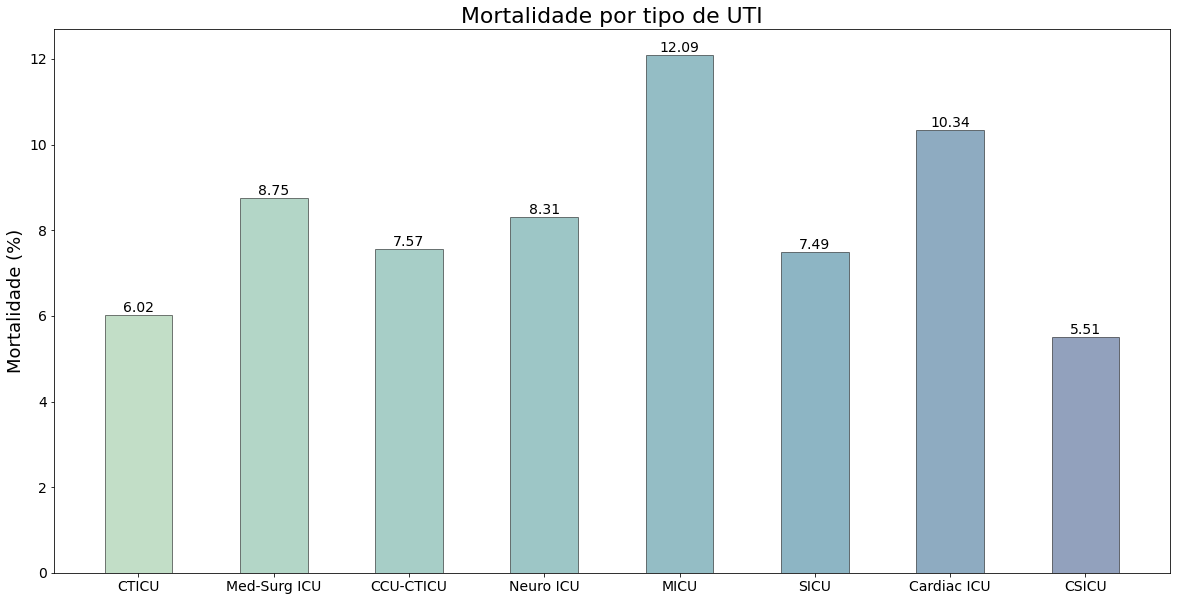

In [27]:
# Atribuição de dados para o gráfico
x_data = icu_types
y_data = [round(value * 100, 2) for value in death_ratio_icu_type]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por tipo de UTI', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_uti_type.png')
plt.show()

#### Diagnósticos Apache 3 e Apache 2

In [28]:
print('Quantidade de valores nulos no atributo apache_3j_bodysystem: ', data['apache_3j_bodysystem'].isnull().sum())
print('Quantidade de valores nulos no atributo apache_2_bodysystem: ', data['apache_2_bodysystem'].isnull().sum())

temp = data[data.apache_3j_bodysystem.isnull()]
print('Quantidade de entradas em que apache_3j_bodysystem é nulo e apache_2_bodysystem não é: ', len(temp[temp.apache_2_bodysystem.notnull()]))

Quantidade de valores nulos no atributo apache_3j_bodysystem:  1662
Quantidade de valores nulos no atributo apache_2_bodysystem:  1662
Quantidade de entradas em que apache_3j_bodysystem é nulo e apache_2_bodysystem não é:  0


Podemos ver que os valores que faltam no diagnóstico Apache 3 são os mesmos faltando no Apache 2. A solução para esses casos porém será resolvida posteriormente.

Em alguns casos o mesmo diagnóstico aparece escrito de forma diferente, no código seguinte resolvemos isso antes de continuar.

In [29]:
data['apache_2_bodysystem'] = data['apache_2_bodysystem'].replace('Undefined diagnoses', 'Undefined Diagnoses')

In [30]:
apache_3_types = list(dict.fromkeys(data['apache_3j_bodysystem']))
apache_2_types = list(dict.fromkeys(data['apache_2_bodysystem']))
apache_3_types.remove(numpy.nan)
apache_2_types.remove(numpy.nan)
apache_3_types.sort()
apache_2_types.sort()

print('Tipos de diagnóstico Apache 3: ', apache_3_types)
print('Tipos de diagnóstico Apache 2: ', apache_2_types)

Tipos de diagnóstico Apache 3:  ['Cardiovascular', 'Gastrointestinal', 'Genitourinary', 'Gynecological', 'Hematological', 'Metabolic', 'Musculoskeletal/Skin', 'Neurological', 'Respiratory', 'Sepsis', 'Trauma']
Tipos de diagnóstico Apache 2:  ['Cardiovascular', 'Gastrointestinal', 'Haematologic', 'Metabolic', 'Neurologic', 'Renal/Genitourinary', 'Respiratory', 'Trauma', 'Undefined Diagnoses']


In [31]:
death_ratio_apache_3 = []
for a3type in apache_3_types:
    qtd_death = len(death_data.loc[death_data['apache_3j_bodysystem'].str.match(a3type, na=False)])
    qtd_non_death = len(data.loc[data['apache_3j_bodysystem'].str.match(a3type, na=False)])
    death_ratio_apache_3.append(qtd_death / qtd_non_death)

death_ratio_apache_2 = []
for a2type in apache_2_types:
    qtd_death = len(death_data.loc[death_data['apache_2_bodysystem'].str.match(a2type, na=False)])
    qtd_non_death = len(data.loc[data['apache_2_bodysystem'].str.match(a2type, na=False)])
    death_ratio_apache_2.append(qtd_death / qtd_non_death)

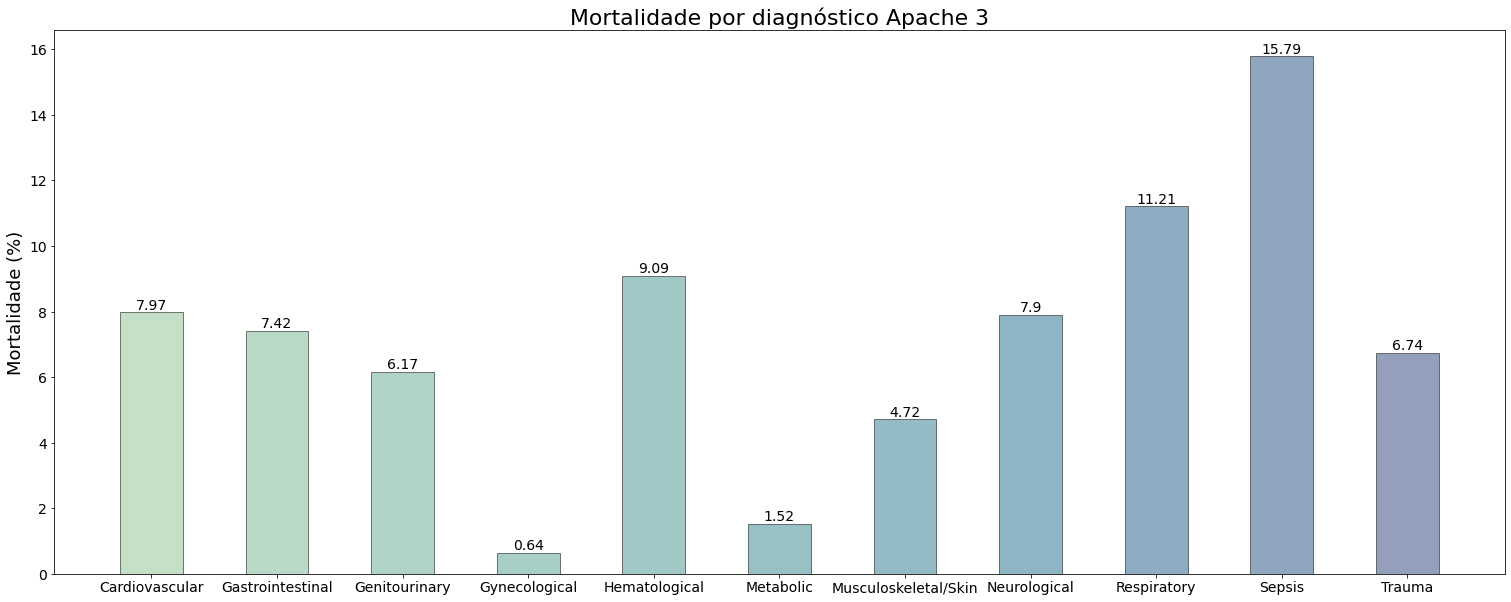

In [32]:
x_data = apache_3_types
y_data = [round(value * 100, 2) for value in death_ratio_apache_3]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(26, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por diagnóstico Apache 3', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_apache_3.png')
plt.show()

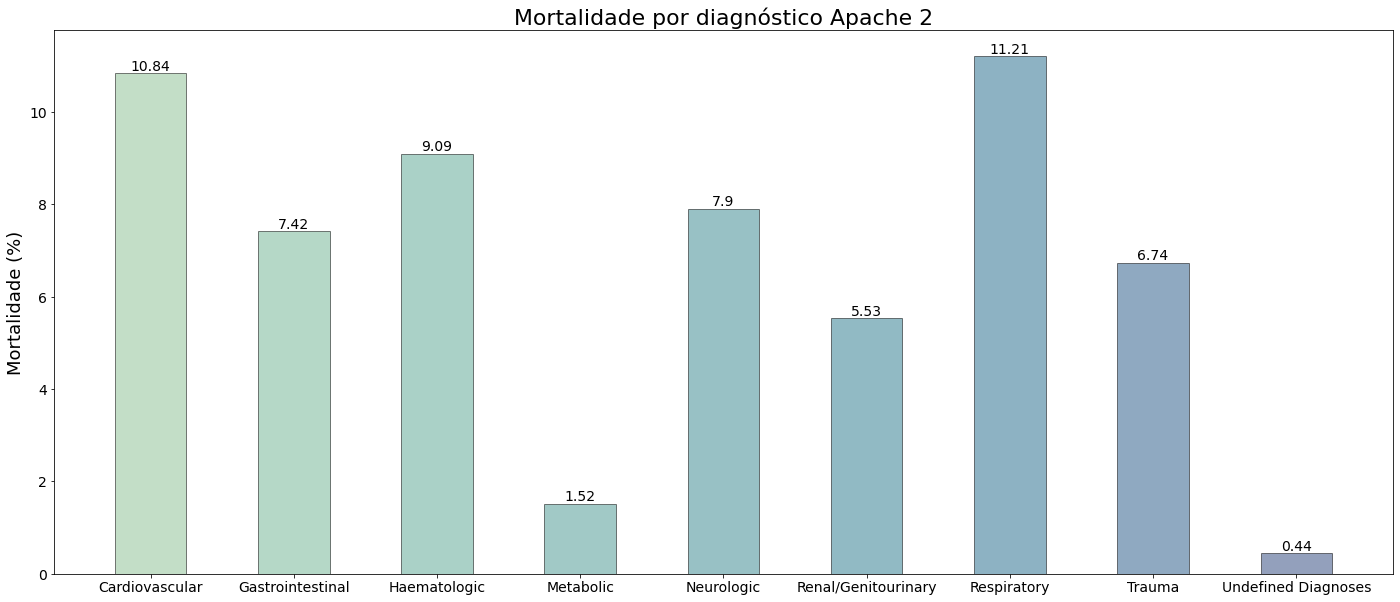

In [33]:
x_data = apache_2_types
y_data = [round(value * 100, 2) for value in death_ratio_apache_2]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(24, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por diagnóstico Apache 2', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_apache_2.png')
plt.show()

Os gráficos mostram que os últimos atributos avaliados podem vir a ser relevantes para a rede neural, logo todas serão mantidas com exceção da coluna referente ao diagnóstico Apache 2, que é uma versão menos precisa do diagnóstico Apache 3.

In [34]:
data = data.drop('apache_2_diagnosis', axis=1)
data = data.drop('apache_2_bodysystem', axis=1)
data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,180.3,Floor,admit,CTICU,0.541667,73.9,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,0
1,77.0,27.42,0,Caucasian,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,0
2,25.0,31.95,0,Caucasian,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,0
3,81.0,22.64,1,Caucasian,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,0
4,19.0,NaN,0,Caucasian,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,0


## Outros Atributos

Para o restante dos atributos com valores ausentes vamos utilizar 3 abordagens diferentes, e analisar qual tem melhor resultado. Mas primeiro vamos converter os valores simbólicos para numéricos, uma vez que não serão suportados pelo algoritmo.

### Conversão simbólico-numérico

Iremos atribuir a posição de seu índice para cada valor simbólico dos seguintes atributos na base de dados:

- ethnicity 
- icu_admit_source 
- icu_stay_type 
- icu_type 
- apache_3j_bodysystem

In [35]:
# Valores simbólicos possíveis em cada atributo.
ethnicity_types = ['Caucasian', 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']
icu_admit_sources = ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU']
icu_stay_types = ['admit', 'readmit', 'transfer']
icu_types = ['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU', 'Cardiac ICU', 'CSICU']
apache_3_types = ['Cardiovascular', 'Gastrointestinal', 'Genitourinary', 'Gynecological', 'Hematological', 'Metabolic', 'Musculoskeletal/Skin', 
                  'Neurological', 'Respiratory', 'Sepsis', 'Trauma']

# Listas de indices atribuidos a cada valor simbólico.
ethnicity_translation = [(index, ethnicity_types[index]) for index in range(0, len(ethnicity_types))]
icu_admit_source_translation = [(index, icu_admit_sources[index]) for index in range(0, len(icu_admit_sources))]
icu_stay_type_translation = [(index, icu_stay_types[index]) for index in range(0, len(icu_stay_types))]
icu_type_translation = [(index, icu_types[index]) for index in range(0, len(icu_types))]
apache_3_translation = [(index, apache_3_types[index]) for index in range(0, len(apache_3_types))]

In [36]:
# Substituição dos valores simbólicos por valores numéricos na base de dados.
for values in ethnicity_translation:
    data.loc[data.ethnicity == values[1], 'ethnicity'] = values[0]
for values in icu_admit_source_translation:
    data.loc[data.icu_admit_source == values[1], 'icu_admit_source'] = values[0]
for values in icu_stay_type_translation:
    data.loc[data.icu_stay_type == values[1], 'icu_stay_type'] = values[0]
for values in icu_type_translation:
    data.loc[data.icu_type == values[1], 'icu_type'] = values[0]
for values in apache_3_translation:
    data.loc[data.apache_3j_bodysystem == values[1], 'apache_3j_bodysystem'] = values[0]

# Resultado
data.sample(frac=1).head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
51264,71.0,21.608327,0,0,165.1,1,0,1,0.231944,58.90,404.03,0,0.0,2.0,4.0,0.0,2.0,128.0,0.0,58.0,34.0,36.38,0.0,80.0,39.0,80.0,39.0,120.0,90.0,105.0,58.0,105.0,58.0,30.0,11.0,100.0,98.0,155.0,98.0,155.0,98.0,36.94,36.38,69.0,55.0,69.0,55.0,98.0,94.0,83.0,66.0,83.0,66.0,13.0,11.0,100.0,99.0,128.0,98.0,128.0,98.0,121.0,108.0,3.6,3.4,0.24,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
36278,59.0,32.029385,0,0,165.0,0,0,4,0.357639,87.20,211.09,0,0.0,2.0,4.0,0.0,1.0,104.0,0.0,119.0,4.0,37.10,1.0,77.0,50.0,77.0,50.0,101.0,67.0,93.0,62.0,93.0,62.0,21.0,9.0,100.0,91.0,141.0,96.0,141.0,96.0,38.00,36.70,68.0,68.0,68.0,68.0,101.0,101.0,73.0,73.0,73.0,73.0,18.0,18.0,91.0,91.0,115.0,115.0,115.0,115.0,125.0,125.0,3.9,3.9,0.13,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1
50944,79.0,24.404819,0,0,182.9,1,0,1,0.170139,81.64,802.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,103.0,56.0,NaN,0.0,87.0,61.0,87.0,61.0,113.0,85.0,103.0,74.0,103.0,74.0,56.0,12.0,100.0,92.0,146.0,94.0,146.0,94.0,NaN,NaN,82.0,75.0,82.0,75.0,108.0,104.0,97.0,95.0,97.0,95.0,49.0,41.0,100.0,100.0,131.0,119.0,131.0,119.0,88.0,88.0,3.8,3.8,0.14,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
85769,81.0,25.200186,1,0,170.2,2,0,1,0.120139,73.00,1404.01,1,0.0,3.0,6.0,0.0,1.0,59.0,1.0,47.0,33.0,36.50,1.0,57.0,39.0,57.0,39.0,63.0,59.0,73.0,51.0,73.0,51.0,33.0,17.0,100.0,94.0,131.0,81.0,131.0,81.0,37.70,36.50,56.0,39.0,56.0,39.0,61.0,59.0,55.0,51.0,55.0,51.0,25.0,17.0,98.0,94.0,98.0,81.0,98.0,81.0,122.0,99.0,4.7,4.3,0.18,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
26330,76.0,26.824092,1,0,180.3,2,0,7,0.030556,87.20,1207.01,1,0.0,4.0,6.0,0.0,5.0,57.0,1.0,54.0,10.0,35.50,1.0,67.0,56.0,67.0,56.0,84.0,57.0,78.0,65.0,78.0,65.0,30.0,12.0,100.0,91.0,114.0,95.0,114.0,95.0,37.50,35.50,66.0,40.0,NaN,NaN,75.0,57.0,92.0,54.0,NaN,NaN,14.0,12.0,100.0,100.0,142.0,81.0,NaN,NaN,194.0,122.0,5.3,4.2,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Primeira abordagem: Excluir entradas contendo algum valor nulo.

In [37]:
incomplete_data = data[data.isnull().any(axis=1)]
incomplete_data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
2,25.0,31.95,0,0,172.7,1,0,1,0.000694,95.3,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0
3,81.0,22.64,1,0,165.1,2,0,0,0.000694,61.7,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,19.0,NaN,0,0,188.0,1,0,1,0.073611,NaN,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0
6,59.0,57.45,0,0,165.1,1,0,1,0.000694,156.6,203.01,0,0.0,4.0,6.0,0.0,5.0,133.0,1.0,138.0,53.0,35.0,1.0,76.0,68.0,76.0,68.0,112.0,70.0,117.0,97.0,117.0,97.0,38.0,16.0,100.0,87.0,151.0,133.0,151.0,133.0,37.2,35.0,107.0,79.0,NaN,NaN,79.0,72.0,117.0,117.0,117.0,117.0,18.0,18.0,100.0,100.0,191.0,163.0,NaN,NaN,197.0,129.0,5.0,4.2,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0
7,70.0,NaN,0,0,165.0,1,0,1,0.002083,NaN,501.05,0,0.0,4.0,6.0,0.0,5.0,120.0,0.0,60.0,28.0,36.6,1.0,84.0,46.0,84.0,46.0,118.0,86.0,114.0,60.0,114.0,60.0,28.0,12.0,100.0,92.0,147.0,71.0,147.0,71.0,38.5,36.6,74.0,55.0,74.0,55.0,118.0,114.0,88.0,60.0,88.0,60.0,28.0,26.0,96.0,92.0,119.0,106.0,119.0,106.0,129.0,129.0,5.8,2.4,0.11,0.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,0


In [38]:
print('{}% dos dados estão incompletos'.format(round(len(incomplete_data) / len(data) * 100, 2)))

37.2% dos dados estão incompletos


Remoção de dados incompletos da base de dados

In [39]:
complete_data = data[data.isnull().any(axis=1) == False].copy()
print('Quantidade de dados completos: ', len(complete_data))
complete_data.head()

Quantidade de dados completos:  57598


,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
0,68.0,22.730000,0,0,180.3,0,0,0,0.541667,73.9,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,77.0,27.420000,0,0,160.0,0,0,1,0.927778,70.2,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0
5,67.0,27.560000,0,0,190.5,1,0,1,0.000694,100.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0
9,50.0,25.710000,0,5,175.3,1,0,2,0.060417,79.0,107.01,0,0.0,4.0,6.0,0.0,5.0,94.0,0.0,58.0,46.0,36.3,0.0,83.0,48.0,83.0,48.0,96.0,57.0,101.0,59.0,101.0,59.0,44.0,14.0,100.0,96.0,135.0,78.0,135.0,78.0,37.1,36.4,83.0,61.0,83.0,61.0,96.0,60.0,101.0,77.0,101.0,77.0,29.0,17.0,100.0,96.0,135.0,103.0,135.0,103.0,134.0,134.0,4.1,3.3,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
10,72.0,28.257052,1,1,154.9,2,0,1,0.004861,67.8,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,91.0,87.0,91.0,87.0,23.0,14.0,99.0,93.0,145.0,114.0,145.0,114.0,158.0,133.0,4.2,4.2,0.01,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0


A presença de valores nulos converte a coluna para `float64`. Como removemos os valores nulos vamos converter de volta para ``int64`` as colunas que já eram do tipo inteiro e as que foram convertidas para tipo inteiro.

In [40]:
# Colunas com valor do tipo inteiro
integer_columns = ['age', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'map_apache', 
                   'resprate_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 
                   'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 
                   'd1_resprate_min', 'd1_spo2_max',  'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
                   'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 
                   'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 
                   'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_glucose_max', 'd1_glucose_min',  
                   'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

# Colunas que foram convertidas de valores simbólicos para numéricos
converted_columns = ['ethnicity', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem']

# Conversão de tipo das colunas
for column in integer_columns:
    complete_data[column] = complete_data[column].astype('int64')
for column in converted_columns:
    complete_data[column] = complete_data[column].astype('int64')

complete_data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
0,68,22.730000,0,0,180.3,0,0,0,0.541667,73.9,502.01,0,0,3,6,0,4,118.0,0,40,36,39.3,0,68,37,68,37,119,72,89,46,89,46,34,10,100,74,131,73,131,73,39.9,37.2,68,63,68,63,119,108,86,85,86,85,26,18,100,74,131,115,131,115,168,109,4.0,3.4,0.10,0.05,0,0,1,0,0,0,0,0,9,0
1,77,27.420000,0,0,160.0,0,0,1,0.927778,70.2,203.01,0,0,1,3,0,1,120.0,0,46,33,35.1,1,95,31,95,31,118,72,120,38,120,38,32,12,100,70,159,67,159,67,36.3,35.1,61,48,61,48,114,100,85,57,85,57,31,28,95,70,95,71,95,71,145,128,4.2,3.8,0.47,0.29,0,0,1,0,0,0,0,0,8,0
5,67,27.560000,0,0,190.5,1,0,1,0.000694,100.0,403.01,0,0,4,6,0,5,113.0,0,130,35,36.6,0,100,61,100,61,113,83,127,80,127,80,32,10,97,91,173,107,173,107,36.8,36.6,89,89,89,89,83,83,111,111,111,111,12,12,97,97,143,143,143,143,156,125,3.9,3.7,0.05,0.02,0,0,1,0,0,0,0,0,7,0
9,50,25.710000,0,5,175.3,1,0,2,0.060417,79.0,107.01,0,0,4,6,0,5,94.0,0,58,46,36.3,0,83,48,83,48,96,57,101,59,101,59,44,14,100,96,135,78,135,78,37.1,36.4,83,61,83,61,96,60,101,77,101,77,29,17,100,96,135,103,135,103,134,134,4.1,3.3,0.02,0.01,0,0,0,0,0,0,0,0,0,0
10,72,28.257052,1,1,154.9,2,0,1,0.004861,67.8,1304.08,1,0,4,6,0,5,101.0,0,72,15,36.8,0,72,53,72,53,101,67,93,70,93,70,23,14,99,92,145,95,145,95,37.0,36.7,72,56,72,56,90,70,91,87,91,87,23,14,99,93,145,114,145,114,158,133,4.2,4.2,0.01,0.00,0,0,0,0,1,0,0,0,8,0


In [41]:
complete_data.to_csv('complete_data.csv', index=False)

### Segunda abordagem: Preenchimento com média e moda.

Para os atributos Qualitativos, preencheremos os valores faltando com a moda, já para os atributos quantitativos usaremos a média.

In [42]:
# Lista de atributos que ainda contem valores nulos
data.columns[data.isnull().any()]

Index(['age', 'bmi', 'height', 'weight', 'apache_3j_diagnosis', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_

Dividimos os atributos em qualitativos, quantitativos continuos e quantitativos discretos

In [43]:
qualitative_attrs = ['arf_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 
                     'solid_tumor_with_metastasis', 'apache_3j_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 
                     'intubated_apache', 'ventilated_apache', 'apache_3j_bodysystem']

quantitative_continuous_attrs = ['bmi', 'height', 'weight', 'temp_apache', 'd1_temp_max', 'd1_temp_min', 'd1_potassium_max', 'd1_potassium_min', 
                                 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']

quantitative_discrete_attrs = ['age', 'heart_rate_apache', 'map_apache', 'resprate_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
                               'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
                               'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                               'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 
                               'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 
                               'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 
                               'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_glucose_max', 'd1_glucose_min']

In [44]:
# Fazemos uma cópia da base de dados
statistic_data = data.copy()

# Preencheremos os valores nulos dos atributos qualitativos com a moda
for attr in qualitative_attrs:
    mode = data[attr].mode()[0]
    statistic_data[attr].fillna(mode, inplace=True)

# Preencheremos os valores nulos dos atributos quantitativos continuos com a média
for attr in quantitative_continuous_attrs:
    mean = data[attr].mean()
    statistic_data[attr].fillna(mean, inplace=True)

# Preencheremos os valores nulos dos atributos quantitativos discretos com o arredondamento da média
for attr in quantitative_discrete_attrs:
    mean = data[attr].mean()
    statistic_data[attr].fillna(numpy.round(mean), inplace=True)

statistic_data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
0,68.0,22.730000,0,0,180.3,0,0,0,0.541667,73.90000,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.000000,3.400000,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,77.0,27.420000,0,0,160.0,0,0,1,0.927778,70.20000,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.200000,3.800000,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,0
2,25.0,31.950000,0,0,172.7,1,0,1,0.000694,95.30000,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,175.0,114.0,4.251594,3.934658,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0
3,81.0,22.640000,1,0,165.1,2,0,0,0.000694,61.70000,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,76.0,63.0,100.0,96.0,92.0,71.0,92.0,80.0,12.0,11.0,100.0,99.0,136.0,106.0,133.0,117.0,185.0,88.0,5.000000,3.500000,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,19.0,29.185818,0,0,188.0,1,0,1,0.073611,84.02834,601.01,0,0.0,4.0,6.0,0.0,5.0,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,23.0,17.0,100.0,100.0,130.0,120.0,130.0,120.0,175.0,114.0,4.251594,3.934658,0.086787,0.043955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0


Como dito anteriormente, a presença de valores nulos converte a coluna para `float64`. Como removemos os valores nulos vamos converter de volta para ``int64`` as colunas que já eram do tipo inteiro e as que foram convertidas para tipo inteiro.

In [45]:
# Conversão de tipo das colunas
for column in integer_columns:
    statistic_data[column] = statistic_data[column].astype('int64')
for column in converted_columns:
    statistic_data[column] = statistic_data[column].astype('int64')

statistic_data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
0,68,22.730000,0,0,180.3,0,0,0,0.541667,73.90000,502.01,0,0,3,6,0,4,118.0,0,40,36,39.3,0,68,37,68,37,119,72,89,46,89,46,34,10,100,74,131,73,131,73,39.9,37.2,68,63,68,63,119,108,86,85,86,85,26,18,100,74,131,115,131,115,168,109,4.000000,3.400000,0.100000,0.050000,0,0,1,0,0,0,0,0,9,0
1,77,27.420000,0,0,160.0,0,0,1,0.927778,70.20000,203.01,0,0,1,3,0,1,120.0,0,46,33,35.1,1,95,31,95,31,118,72,120,38,120,38,32,12,100,70,159,67,159,67,36.3,35.1,61,48,61,48,114,100,85,57,85,57,31,28,95,70,95,71,95,71,145,128,4.200000,3.800000,0.470000,0.290000,0,0,1,0,0,0,0,0,8,0
2,25,31.950000,0,0,172.7,1,0,1,0.000694,95.30000,703.03,0,0,3,6,0,5,102.0,0,68,37,36.7,0,88,48,88,48,96,68,102,68,102,68,21,8,98,91,148,105,148,105,37.0,36.7,88,58,88,58,96,78,91,83,91,83,20,16,98,91,148,124,148,124,175,114,4.251594,3.934658,0.000000,0.000000,0,0,0,0,0,0,0,0,5,0
3,81,22.640000,1,0,165.1,2,0,0,0.000694,61.70000,1206.03,1,0,4,6,0,5,114.0,1,60,4,34.8,1,48,42,48,42,116,92,84,84,84,84,23,7,100,95,158,84,158,84,38.0,34.8,62,44,76,63,100,96,92,71,92,80,12,11,100,99,136,106,133,117,185,88,5.000000,3.500000,0.040000,0.030000,0,0,0,0,0,0,0,0,0,0
4,19,29.185818,0,0,188.0,1,0,1,0.073611,84.02834,601.01,0,0,4,6,0,5,60.0,0,103,16,36.7,0,99,57,99,57,89,60,104,90,104,90,18,16,100,96,147,120,147,120,37.2,36.7,99,68,99,68,89,76,104,92,104,92,23,17,100,100,130,120,130,120,175,114,4.251594,3.934658,0.086787,0.043955,0,0,0,0,0,0,0,0,10,0


In [46]:
statistic_data.to_csv('statistic_data.csv', index=False)

### Terceira abordagem: Preenchimento por meio de indutor.

In [48]:
# imputer = MissForest()
# data_for_imputation = data.drop('hospital_death', axis=1)
# imputed_data = imputer.fit_transform(data_for_imputation)

In [ ]:
statistic_data.isnull().sum()

age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
height                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_heartrate_min    